In [1]:
import os
current_path = os.getcwd()
folder = "MA"
path =  folder.join(current_path.split(folder)[:-1])+folder
os.chdir(path)

In [2]:
import numpy as np
import pandas as pd
import statistics
from Scenarios.scenario_types.BaseScenario import BaseScenario
from Repair.Robust_PCA.robust_PCA_estimator import Robust_PCA_estimator   
from sklearn.decomposition import PCA


from matplotlib import pyplot as plt

plt.rcParams.update({

    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [3]:
scen = BaseScenario("YAHOO.csv" ,data_columns = [1,2,3,4,5])

['theisplots\\IMR.eps', 'outputfile_2', 'run.py', 'bayesiancomp', 'thesisplots', 'ParameterTuning', '.gitignore', 'myfile.txt', 'IMR.eps', 'IMR.pgf', 'run_ressources', 'notebooks', 'Scenarios', '.git', 'data_methods', 'varanomsizeampBayesianOptimization.svg', 'A_questions', 'myfile.toml', '__pycache__', 'Injection', '.idea', 'Repair', 'searchresults.csv', 'install.sh', 'play.py', 'screen_example2', 'IMR.svg', 'Data', 'play2.py', 'error_ranking.py']
Data/YAHOO.csv


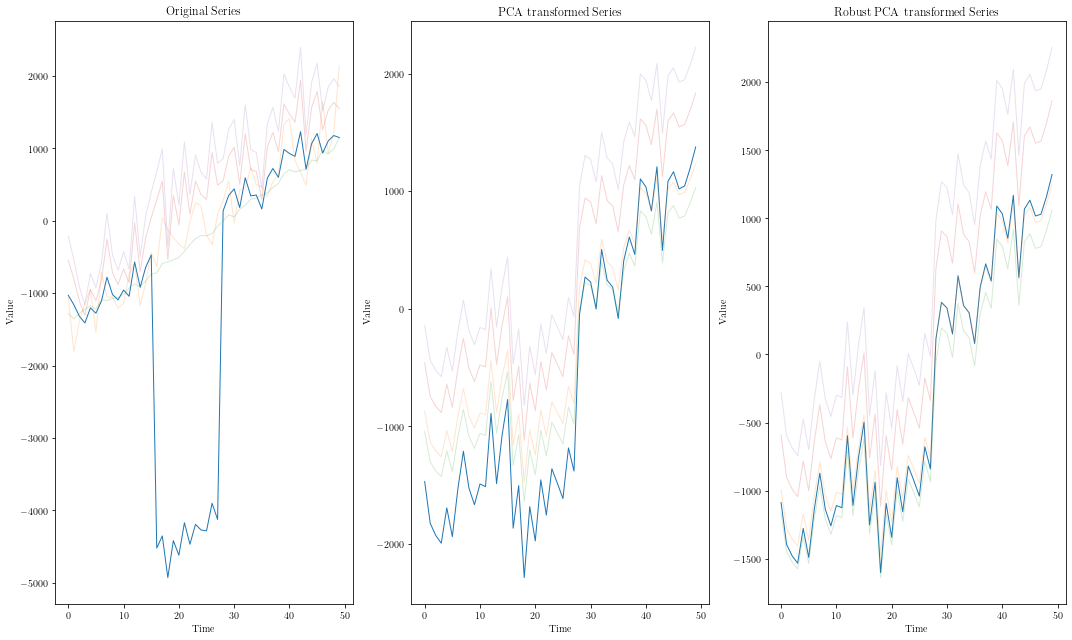

In [4]:
start= 80#250
end = 130
n_components = 1
injected = scen.i_get_scenario(0)["injected"]


pca = PCA(n_components=n_components) 


transformed = pca.fit_transform(injected)
pca_predicted = pd.DataFrame(pca.inverse_transform(transformed))

f, axs  = plt.subplots(1, 3, figsize=(15, 9))
ax1,ax2,ax3 = axs
for name,col in injected.iloc[start:end,:].iteritems():
    ax1.plot(np.array(col),alpha=0.2 if name != injected.columns[0] else 1,lw = 1)

ax1.set_title("Original Series")
ax1.set_xlabel("Time", fontsize=10)
ax1.set_ylabel("Value", fontsize=10)

for name,col in pca_predicted.iloc[start:end,:].iteritems():
    ax2.plot(np.array(col),alpha=0.2 if name != pca_predicted.columns[0] else 1 , lw = 1)
ax2.set_title("PCA transformed Series")
ax2.set_xlabel("Time", fontsize=10)
ax2.set_ylabel("Value", fontsize=10)



estim = Robust_PCA_estimator(n_components=n_components)
estim.fit(injected)
predicted = pd.DataFrame(estim.reduce(injected))


for name,col in predicted.iloc[start:end,:].iteritems():
    ax3.plot(np.array(col),alpha=0.2 if name != predicted.columns[0] else 1 ,lw = 1)
ax3.set_title("Robust PCA transformed Series")
ax3.set_xlabel("Time", fontsize=10)
ax3.set_ylabel("Value", fontsize=10)


plt.tight_layout()



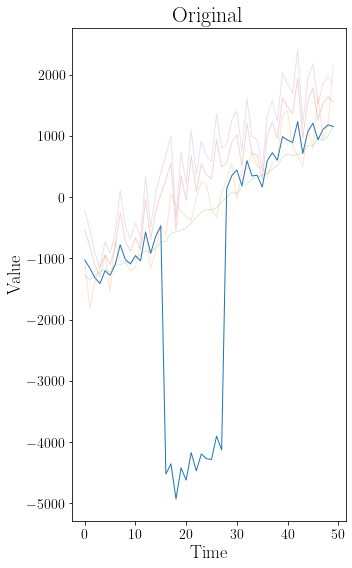

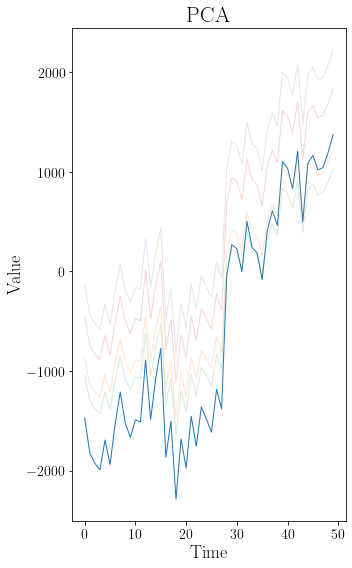

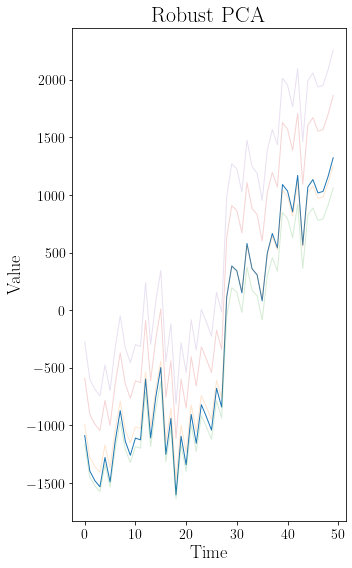

In [6]:
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (5, 8)



start= 80#250
end = 130
n_components = 1
injected = scen.i_get_scenario(0)["injected"]


pca = PCA(n_components=n_components) 


transformed = pca.fit_transform(injected)
pca_predicted = pd.DataFrame(pca.inverse_transform(transformed))


estim = Robust_PCA_estimator(n_components=n_components)
estim.fit(injected)
predicted = pd.DataFrame(estim.reduce(injected))




for title , df in zip(["Original","PCA","Robust PCA"],[injected,pca_predicted,predicted]):
    for name,col in df.iloc[start:end,:].iteritems():
        plt.plot(np.array(col),alpha=0.2 if name != df.columns[0] else 1,lw = 1)


    plt.xlabel("Time", fontsize=18)
    plt.ylabel("Value", fontsize=18)
    plt.xticks(fontsize=14)    
    plt.title(title ,fontsize=22)
    plt.yticks(fontsize=14)
    plt.tight_layout()
    plt.savefig(f"thesisplots/{title}.pdf")
    plt.show()
    
    df.to_csv(f"thesisplots/{title}.txt",sep='\t'
             ,index_label="x")
